# Red Wine Quality 분류
- https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
- 데이터 세트는 분류 또는 회귀 작업으로 볼 수 있습니다. 등급이 정렬되고 균형이 맞지 않습니다(예: 우수하거나 불량한 와인보다 일반 와인이 훨씬 더 많습니다).
- wine 데이터셋
    - fixed acidity(결합산): 와인의 산도를 제어한다.(타르타르산+사과산)
    - volatile acidity(휘발성산): 와인향을 결정
    - citric acid(구연산): 소량으로 발견되는 구연산은 와인에 '신선함'과 풍미를 더할 수 있습니다.
    - residual sugar(잔여설탕): 발효가 끝난 후 남은 설탕의 양은 1g/리터 미만의 와인을 찾는 경우는 드물고 45g/리터 이상의 와인은 달콤한 것으로 간주됩니다.
    - chlorides(염화물): 와인에 들어있는 소금의 양
    - free sulfur dioxide(유리 이산화황): SO2의 자유 형태는 분자 SO2(용해 기체)와 중아황산 이온 사이의 평형 상태로 존재합니다. 그것은 미생물의 성장과 와인의 산화를 방지
    - total sulfur dioxide(총 이산화황): S02의 자유 및 결합 형태의 양
    - density(밀도): 물의 밀도는 알코올과 당도의 퍼센트에 따라 물의 밀도에 가깝습니다.
    - pH: 와인의 산성 또는 염기성 정도를 0(매우 산성)에서 14(매우 염기성)까지의 척도로 설명합니다. 대부분의 와인은 pH 척도에서 3-4 사이
    - sulphates(황산염): 이산화황 가스(S02) 수준에 기여할 수 있는 와인 첨가제, 항균 및 항산화제 역할
    - alcohol	
    - quality(품질): 출력 변수(감각 데이터 기반, 0에서 10 사이의 점수)

## Kaggle API를 통하여 데이터 가져오기

In [ ]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import ast
with open('kaggle.txt', 'r') as file: # 텍스트 파일에서 딕셔너리 불러오기
    # api = eval(inf.read())
    api = ast.literal_eval(file.read()) # 보안상 권장

In [ ]:
import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = api['username']
os.environ['KAGGLE_KEY'] = api['key']

In [ ]:
# 캐글 데이터셋(로컬)
!pip install kaggle --upgrade
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [ ]:
cd /content/mnt/MyDrive/데이터/kaggle

/content/mnt/MyDrive/데이터/kaggle


In [ ]:
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 3.56MB/s]


In [ ]:
import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('./zip')

In [ ]:
import zipfile
fantasy_zip = zipfile.ZipFile('red-wine-quality-cortez-et-al-2009.zip')
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'./zip')

#fantasy_zip.close()

'zip/winequality-red.csv'

In [ ]:
from glob import glob
df = pd.read_csv(glob('./zip/*.csv')[0])
df
# df = pd.read_csv('./zip/winequality-red.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# 방법1- 기본
tmp = []
for x in df['quality']:
    if x>6.5:
        tmp.append('good')
    else:
        tmp.append('bad')
df['new_quality'] = tmp

In [ ]:
# 방법2
df['new_quality'] = ['good' if x>6.5 else 'bad' for x in df['quality']]

In [ ]:
# 방법3
def function_quality(x):
    if x['quality']>6.5:
        return 'good'
    else:
        return 'bad'
df['new_quality'] = df.apply(function_quality, axis=1)

In [ ]:
# new_quality는 문자열 자료 => LabelEncoding 필요
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['new_quality'] = label.fit_transform(df['new_quality'])

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
# 0(bad)는 1382건, 1(good)이 217건
df['new_quality'].groupby(df['new_quality']).count()

new_quality
0    1382
1     217
Name: new_quality, dtype: int64

## 1. EDA

In [ ]:
# https://www.kaggle.com/egemenuurdalg/linear-regression
# 와인의 품질을 0~10 사이의 숫자로 예측
# 회귀분석
from statsmodels.api import OLS, add_constant # p-value나 회귀계수를 확인할 수 있음
from sklearn.linear_model import LinearRegression # 회귀분석 모델
from sklearn.metrics import mean_squared_error # 평균제곱오차
from sklearn.datasets import make_regression # 회귀분석용 가상데이터 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score # 데이터 분할
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize # 정규화

In [ ]:
data = df
data.isnull().sum() # na값 확인

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
new_quality             0
dtype: int64

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


## 2. 데이터 분리

In [ ]:
# x,y 데이터 분리
y=data.quality
X=data.drop(['quality'],axis=1)

# 훈련 데이터와 테스트 데이터 분리
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
# 필수
# 훈련과 테스트의 x의 열갯수는 같아야 함
# 훈련과 테스트의 x,y의 행갯수는 같아야 함.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 12), (400, 12), (1199,), (400,))

In [ ]:
# 회귀분석을 하기 전 실행해보는 것이 좋음
# OLS(최소제곱법) 선형회귀 - (참고) 04_선형회귀분석.ipynb
ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.181e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        09:28:04   Log-Likelihood:                         -913.15
No. Observations:                1199   AIC:                                      1850.
Df Residuals:                    1187   BIC:                                      1911.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0047      0.015      0.307      0.759      -0.025       0.035
volatile acidity        -0.7459      0.112     -6.668      0.000      -0.965      -0.526
citric acid             -0.2344      0.137     -1.711      0.087      -0.503       0.034
residual sugar          -0.0142      0.011     -1.280      0.201      -0.036       0.008
chlorides               -0.9585      0.375     -2.556      0.011      -1.694      -0.223
free sulfur dioxide      0.0054      0.002      2.657      0.008       0.001       0.009
total sulfur dioxide    -0.0026      0.001     -3.866      0.000      -0.004      -0.001
density                  4.8377      0.575      8.416      0.000       3.710       5.965
pH                      -0.2150      0.147     -1.458      0.145      -0.504       0.074
sulphates                0.4663      0.101      4.634      0.000       0.269       0.664
alcohol                  0.1541      0.017      8.987      0.000       0.120       0.188
new_quality              1.3260      0.050     26.518      0.000       1.228       1.424
==============================================================================
Omnibus:                      126.060   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.498
Skew:                          -0.696   Prob(JB):                     2.94e-49
Kurtosis:                       4.593   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# p-value가 높은 변수 제거(기준: 일반적으로 0.05이상)
X.drop(['fixed acidity','citric acid','residual sugar'],axis=1,inplace=True) 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 9), (400, 9), (1199,), (400,))

## 3. 모델 학습/평가
- 선형 회귀 모형
- https://www.kaggle.com/egemenuurdalg/linear-regression

### Regression Model with statsmodels.api

In [ ]:
ols_model=OLS(y_train,X_train) 
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.571e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        09:28:13   Log-Likelihood:                         -916.13
No. Observations:                1199   AIC:                                      1850.
Df Residuals:                    1190   BIC:                                      1896.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -0.6395      0.094     -6.823      0.000      -0.823      -0.456
chlorides               -1.1445      0.355     -3.228      0.001      -1.840      -0.449
free sulfur dioxide      0.0059      0.002      2.945      0.003       0.002       0.010
total sulfur dioxide    -0.0030      0.001     -4.624      0.000      -0.004      -0.002
density                  4.5048      0.372     12.125      0.000       3.776       5.234
pH                      -0.1167      0.109     -1.070      0.285      -0.331       0.097
sulphates                0.4690      0.100      4.672      0.000       0.272       0.666
alcohol                  0.1458      0.017      8.684      0.000       0.113       0.179
new_quality              1.3189      0.050     26.396      0.000       1.221       1.417
==============================================================================
Omnibus:                      134.076   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.604
Skew:                          -0.720   Prob(JB):                     4.65e-54
Kurtosis:                       4.685   Cond. No.                     1.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- [상수항 결합](https://datascienceschool.net/03%20machine%20learning/04.02%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88.html)
    - 회귀분석모형 수식을 간단하게 만들기 위해 다음과 같이 상수항을 독립변수 데이터에 추가하는 것을 상수항 결합(bias augmentation)작업이라고 한다.

In [ ]:
X_train=add_constant(X_train) # add_constant: 상수항을 추가하는 것 => 변수의 영향력을 줄임(앞의 모델에 비해서 결정계수값이 많이 낮아짐)
X_test=add_constant(X_test) # X_test['const'] = 1

ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     192.3
Date:                Fri, 24 Sep 2021   Prob (F-statistic):          8.38e-225
Time:                        09:28:18   Log-Likelihood:                -915.95
No. Observations:                1199   AIC:                             1852.
Df Residuals:                    1189   BIC:                             1903.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.9576      9.892      0.602      0.547     -13.451      25.366
volatile acidity        -0.6385      0.094     -6.809      0.000      -0.822      -0.455
chlorides               -1.1532      0.355     -3.250      0.001      -1.850      -0.457
free sulfur dioxide      0.0059      0.002      2.922      0.004       0.002       0.010
total sulfur dioxide    -0.0030      0.001     -4.637      0.000      -0.004      -0.002
density                 -1.3712      9.764     -0.140      0.888     -20.528      17.785
pH                      -0.1336      0.113     -1.186      0.236      -0.355       0.087
sulphates                0.4780      0.102      4.708      0.000       0.279       0.677
alcohol                  0.1410      0.019      7.609      0.000       0.105       0.177
new_quality              1.3186      0.050     26.381      0.000       1.221       1.417
==============================================================================
Omnibus:                      132.887   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.679
Skew:                          -0.718   Prob(JB):                     3.31e-53
Kurtosis:                       4.667   Cond. No.                     5.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(results.predict(X_test)[0:5]) # 예측값, 실수
print('\n')
print(y_test[:5]) # 실제값, 정수

803     5.284097
124     5.115874
350     5.460557
682     5.417433
1326    5.545206
dtype: float64


803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64


In [ ]:
def rounder(array): # 내림 함수, 정수형 반환
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [ ]:
ols_pred=results.predict(X_test)
rounded_pred_ols=rounder(ols_pred)
# RMSE는 낮을수록 좋음
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')

The RMSE of sklearn model: 0.722841614740048


In [ ]:
# 위의 결과와 차이가 나는 이유는 현재 코드에서는 예측값을 내림을 하지 않고 실수형을 사용했기 때문이다.
sub = (results.predict(X_test) - y_test)**2
np.sqrt(np.mean(sub)) # RMSE

0.4982710832755094

### Regression Model with Scikit-*Learn*

In [ ]:
lm=LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: ', np.round(lm.coef_,2)) # w값
print('Intercept: ', np.round(lm.intercept_,2)) # b값

Coefficients:  [ 0.   -0.64 -1.15  0.01 -0.   -1.37 -0.13  0.48  0.14  1.32]
Intercept:  5.96


In [ ]:
preds=lm.predict(X_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.722841614740048


- 상수항을 추가하지 않고 모델링

In [ ]:
del X_train['const']
del X_test['const']

In [ ]:
lm=LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: ', np.round(lm.coef_,2)) # w값
print('Intercept: ', np.round(lm.intercept_,2)) # b값
preds=lm.predict(X_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

Coefficients:  [-0.64 -1.15  0.01 -0.   -1.37 -0.13  0.48  0.14  1.32]
Intercept:  5.96
The RMSE of sklearn model: 0.722841614740048


## 4. 다른 방법으로 작업
- https://www.kaggle.com/henriqueosinski/eda-and-multi-class-classification
- 멀티클래스: 다항분류(레이블 결과값이 3개 이상인 경우)
- 딥러닝에서는 멀티클래스를 사진 한 장에 여러개의 의미가 부여된 것을 의미하기도 함.(표정레이블, 성별레이블, 머리스타일레이블 등)

In [ ]:
# 로컬에서 실행할 때
!pip install plotly

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px # plotly: matplotlib와 비슷한 라이브러리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [ ]:
df = data

- EDA

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [ ]:
px.histogram(df,x= 'quality')

In [ ]:
df[df['quality']==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3,0
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3,0
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3,0
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3,0
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3,0
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3,0
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3,0
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3,0
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3,0
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3,0


In [ ]:
df[df['total sulfur dioxide'] > 150] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5,0
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6,0
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5,0
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5,0
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5,0
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5,0
1079,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,1
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,1
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6,0


In [ ]:
# tmp = df[df['quality']==3] # 각 경우의 total sulfur dioxide의 std값 비교
# tmp.describe()

# finding the percentage between free aand total sulphur dioxide 
df['relative sulphur'] = df['free sulfur dioxide']/df['total sulfur dioxide']

#lets make some plots
print([i for i in df.columns])
fig = px.imshow(df.corr())
fig.show()
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'new_quality', 'relative sulphur']


- 데이터 분리 및 스케일링

In [ ]:
n_neigh = len(np.unique(df['quality'])) # 범주
y = df.pop('quality')

x = df.values

In [ ]:
n_neigh

6

In [ ]:
type(x), type(y)

(numpy.ndarray, pandas.core.series.Series)

In [ ]:
from sklearn.preprocessing import StandardScaler
SE = StandardScaler()
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)
SE.fit(x_train)
x_train = SE.transform(x_train)
x_test = SE.transform(x_test)

- 모델 학습 및 평가

In [ ]:
# KNN
model = KNeighborsClassifier(n_neighbors = n_neigh)
model.fit(x_train,y_train)
print(f'Average K neighbors precision {model.score(x_test,y_test)}')

Average K neighbors precision 0.685


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.63      0.76      0.69       164
           6       0.69      0.60      0.65       169
           7       0.90      0.98      0.94        48
           8       0.00      0.00      0.00         5

    accuracy                           0.69       400
   macro avg       0.37      0.39      0.38       400
weighted avg       0.66      0.69      0.67       400

[[  0   0   0   1   0   0]
 [  0   0   7   6   0   0]
 [  0   1 125  38   0   0]
 [  0   2  65 102   0   0]
 [  0   0   1   0  47   0]
 [  0   0   0   0   5   0]]


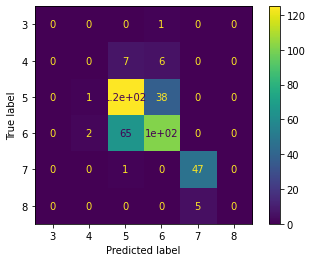

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
prediction = model.predict(x_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality,relative sulphur
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.323529
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.373134
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.277778
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0.283333
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.323529
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0.727273
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,0.764706
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,0.725000
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0.727273


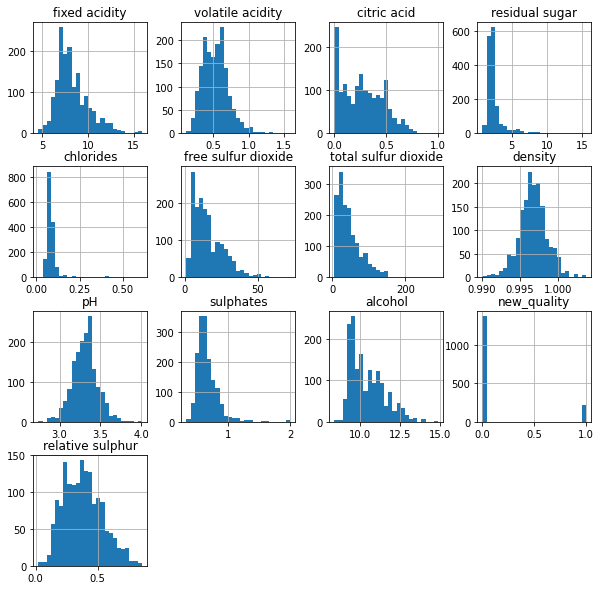

In [ ]:
df.hist(bins=25, figsize=(10,10))
plt.show()

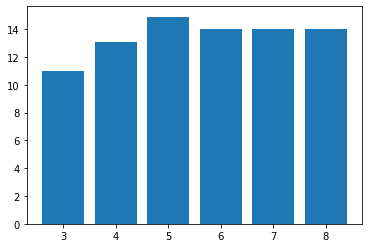

In [ ]:
plt.bar(y,df['alcohol'])
plt.show()

In [ ]:
# 다중공선성 삭제(각 x값들끼리의 상관도가 너무 높아서 생기는 문제를 미리 제거)
# 일단은 모든 변수를 사용하여 작업
# X = df.drop('quality', axis=1)
# X = df.drop(['quality','total sulfur dioxide'], axis=1)
# X = df.drop(['quality','total sulfur dioxide', 'new_quality'], axis=1)
X = df.drop(['new_quality'], axis=1)
y = df['new_quality']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

# 표준화
scaler = StandardScaler()
scaler.fit(X_train)

train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import r2_score

# r2같은 1-MSE 분산으로 예측이 분산의 몇%를 설명하는지를 해석함
def classReport(y,pred):
    print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y,pred))}')
    print(f'The R2 of sklearn model: {r2_score(y,pred)}') # 결정계수
    print('\n')
    print(classification_report(y, pred)) # 분류모델에만 적용 가능
    print(confusion_matrix(y, pred))
    sns.regplot(x=y_test, y=pred, fit_reg=False, x_jitter=0.4, scatter_kws={'alpha': 0.1})
    plt.show()

In [ ]:
# 회귀분석
model = LinearRegression()
model.fit(train_scaled, y_train)
pred = model.predict(test_scaled)
np.sqrt(mean_squared_error(y_test, pred))

0.29412182720546465

The RMSE of sklearn model: 0.33541019662496846
The R2 of sklearn model: 0.02126039910825961


              precision    recall  f1-score   support

           0       0.90      0.97      0.94       347
           1       0.65      0.32      0.43        53

    accuracy                           0.89       400
   macro avg       0.78      0.65      0.68       400
weighted avg       0.87      0.89      0.87       400

[[338   9]
 [ 36  17]]


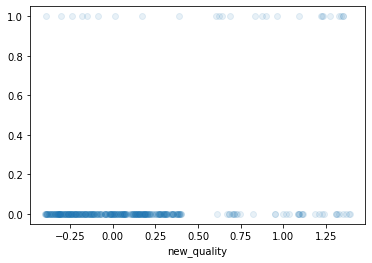

In [ ]:
# 로지스틱회귀
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_scaled, y_train)
pred = model.predict(test_scaled)
# np.sqrt(mean_squared_error(y_test, pred))
classReport(y_test,pred)

The RMSE of sklearn model: 0.33541019662496846
The R2 of sklearn model: 0.02126039910825961


              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.64      0.34      0.44        53

    accuracy                           0.89       400
   macro avg       0.77      0.66      0.69       400
weighted avg       0.87      0.89      0.87       400

[[337  10]
 [ 35  18]]


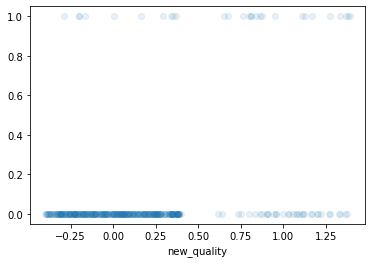

In [ ]:
# KNN
model = KNeighborsClassifier(n_neighbors = n_neigh)
model.fit(train_scaled,y_train)
pred = model.predict(test_scaled)
classReport(y_test,pred)

In [ ]:
# 모델 모듈
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# 학습시킬 모델
model_dict = {'xgb':XGBRegressor(n_estimators=110, learning_rate=0.05 ,max_depth=3, min_samples_split=400, random_state=23),
              'lgbm':LGBMRegressor(),
              'rf':RandomForestRegressor(),
              'svr':SVR(),
              'knn':KNeighborsRegressor(),
              'reg':LinearRegression(),
              'ridge':Ridge(),
              'lasso':Lasso()}

In [ ]:
# 그리드서치로 for를 사용하여 옵션을 변경할 수 있음. 그러나 속도가 매우매우 느림
# 그리드서치는 모든 옵션값을 다 보는 것임. 모두 보지 않고 랜덤하게 옵션을 설정하는 작업을 랜덤서치라고 함.
# 랜덤서치는 최적의 해를 찾지 못할 수도 있는 단점이 있음.

mat_d=[1,2,3,4]; ler_ra=[0.2, 0.3]; split=[2,3,4]

for x in mat_d:
    for y in ler_ra:
        for z in split:
            model = XGBClassifier(n_estimators=110, learning_rate=y ,max_depth=x, min_samples_split=z, random_state=23)

In [ ]:
model_list = ['xgb', 'rf', 'knn', 'lasso']
for x in model_list:
    model = model_dict[x]
    model.fit(train_scaled, y_train)
    pred = model.predict(test_scaled)
    print(f'{x}---------------------------')
    print(f'train: {model.score(train_scaled, y_train)}')
    print(f'test: {model.score(test_scaled, y_test)}')

[09:42:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb---------------------------
train: 0.5573805260453297
test: 0.35395605487273096
rf---------------------------
train: 0.9246736408624955
test: 0.40200315371649187
knn---------------------------
train: 0.48632449628844127
test: 0.23353814365722358
lasso---------------------------
train: 0.0
test: -0.0001594168370504523
